<a href="https://colab.research.google.com/github/aidasalova/COVID_analysis/blob/main/Coronavirus_Plots_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#@title STEP 1 - Import Libraries (Click on Run button, no output will appear)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets



In [18]:
#@title STEP 2 - Import Dataset (Click on Run button, no output will appear; *in the event of a connection error, just rerun) { vertical-output: true }
df=pd.read_csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv", parse_dates=[0], dayfirst=True)
df['dateRep']=pd.to_datetime(df['dateRep'], format='%Y-%m-%d')
df.sort_values(by='dateRep')
pd.options.mode.chained_assignment = None  # default='warn'

In [19]:
#@title STEP 3 - Enable country selection (Click on Run button, no output will appear)

country_list = df.countriesAndTerritories.unique().tolist()

country_input_1 = widgets.Dropdown(
    options=country_list,
    value=country_list[0],
    description='Country:',
    disabled=False,
)
country_input_2 = widgets.Dropdown(
    options=country_list,
    value=country_list[0],
    description='Country:',
    disabled=False,
)



In [44]:
#@title STEP 4.1 - Select country 1 from the dropdown
country_input_1

Dropdown(description='Country:', index=27, options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', …

In [45]:
#@title STEP 4.2 - Select country 2 from the dropdown
country_input_2

Dropdown(description='Country:', index=202, options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',…

In [46]:
#@title STEP 5 - Enable function to plot 14-day accumulated COVID cases per 100,000 (click on Run button, no output will appear)

#Define function to show 14-day accumulated cases in a chart with two countries selection
def my_graph_comparison():
    #Subset dataset by chosen countries (create two subsets)
    countrydf_comparison_1 = df[df["countriesAndTerritories"] == country_input_1.value]
    countrydf_comparison_2 = df[df["countriesAndTerritories"] == country_input_2.value]
    #Set x and y for the first plot
    x_1 = countrydf_comparison_1["dateRep"]
    y_1 = countrydf_comparison_1["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"]
    #Set x and y for the second plot
    x_2 = countrydf_comparison_2["dateRep"]
    y_2 = countrydf_comparison_2["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"]
    #Create plot
    plt.figure(figsize=(20,10))
    plt.plot(x_1,y_1, label=country_input_1.value)
    plt.plot(x_2,y_2, label=country_input_2.value)
    plt.legend()
    plt.title(f"Cumulative Covid-19 cases for 14 days per 100,000 in {country_input_1.value} and {country_input_2.value}")   
    plt.show()


In [47]:
#@title STEP 6 - Enable function to plot 14 Day sum of COVID deaths (click on Run button, no output will appear)

#Define function to show 14 day sum of covid deaths for two countries

def my_graph_biweekly_deaths_comparison():
    #Subset dataset by chosen countries (create two new subsets)
    countrydf_comparison_1 = df[df["countriesAndTerritories"] == country_input_1.value]
    countrydf_comparison_2 = df[df["countriesAndTerritories"] == country_input_2.value]
    #Calculate sum of 14D deaths over a time period
    sum_deaths_1 = countrydf_comparison_1.groupby(pd.Grouper(key="dateRep", freq='14D')).deaths.sum()
    sum_deaths_2 = countrydf_comparison_2.groupby(pd.Grouper(key="dateRep", freq='14D')).deaths.sum()
    #Create plot
    plt.figure(figsize=(20,10))
    plt.plot(sum_deaths_1, label=country_input_1.value)
    plt.plot(sum_deaths_2, label=country_input_2.value)
    plt.legend()
    plt.title(f"Sum of Covid-19 deaths for 14 days in {country_input_1.value} and {country_input_2.value}")   
    plt.show()

In [54]:
#@title STEP 7 - Enable function to plot 14-day sum of COVID cases and sum of COVID deaths (click on Run button, no output will appear)

#Define function to show accumulated cases per 100,000 and sum of covid deaths for 14 days for two countries

def cases_deaths_comparison():
    #Subset dataset by chosen countries (create two subsets)
    countrydf_comparison_1 = df[df["countriesAndTerritories"] == country_input_1.value]
    countrydf_comparison_2 = df[df["countriesAndTerritories"] == country_input_2.value]
    #Calculate sum of 14D deaths over a time period
    sum_deaths_1 = countrydf_comparison_1.groupby(pd.Grouper(key="dateRep", freq='14D')).deaths.sum()
    sum_deaths_2 = countrydf_comparison_2.groupby(pd.Grouper(key="dateRep", freq='14D')).deaths.sum()
    #Calculate sum of 14D cases over a time period
    sum_cases_1 = countrydf_comparison_1.groupby(pd.Grouper(key="dateRep", freq='14D')).cases.sum()
    sum_cases_2 = countrydf_comparison_2.groupby(pd.Grouper(key="dateRep", freq='14D')).cases.sum()
    #Create plot
    plt.figure(figsize=(20,10))
    plt.plot(sum_cases_1, label=(f"Total cases in {country_input_1.value} for 14 days"))
    plt.plot(sum_cases_2, label=(f"Total cases in {country_input_2.value} for 14 days"))
    plt.plot(sum_deaths_1, label=(f"Total deaths in {country_input_1.value} for 14 days"))
    plt.plot(sum_deaths_2, label=(f"Total deaths in {country_input_2.value} for 14 days"))
    plt.yscale("log")
    plt.legend()
    plt.title(f"Sum of Covid-19 cases for 14 days in {country_input_1.value} and {country_input_2.value} and sum of Covid-19 deaths for 14 days in {country_input_1.value} and {country_input_2.value}")   
    plt.show()

In [49]:
#@title STEP 8 - Enable function to calculate total COVID cases and COVID death for the last 14 Days and countries' percentile in the world (click on Run button, no output will appear)
#Functions to print the percentile and total amount of cases and deaths for two selected countries
def percentil_absolute_comp_2():
    
    #Count 14D cases by country
    sum_biweekly_cases= df.groupby([pd.Grouper(key='countriesAndTerritories'), pd.Grouper(key="dateRep", freq='14D')]).cases.sum().to_frame().reset_index()
    #Select the latest number for 14D cases
    sum_cases_latest = sum_biweekly_cases[sum_biweekly_cases["dateRep"] == sum_biweekly_cases["dateRep"].max()]
    sum_cases_latest["pct_rank"] = sum_cases_latest["cases"].rank(pct=True)
    #Subset for the selected countries
    country_percentil_cases_df_1 = sum_cases_latest[sum_cases_latest["countriesAndTerritories"] == country_input_1.value].reset_index()
    country_percentil_cases_df_2 = sum_cases_latest[sum_cases_latest["countriesAndTerritories"] == country_input_2.value].reset_index()
    #Round the percentiles and put in %
    country_percentil_cases_df_pct_1 = round(country_percentil_cases_df_1.iloc[0, 4] * 100, 2)
    country_percentil_cases_df_pct_2 = round(country_percentil_cases_df_2.iloc[0, 4] * 100, 2)
    #Subset the absolute number of cases
    country_percentil_cases_df_absolute_1 = country_percentil_cases_df_1.iloc[0, 3]
    country_percentil_cases_df_absolute_2 = country_percentil_cases_df_2.iloc[0, 3]
    
    #Count 14D deaths by country
    sum_biweekly_deaths = df.groupby([pd.Grouper(key='countriesAndTerritories'), pd.Grouper(key="dateRep", freq='14D')]).deaths.sum().to_frame().reset_index()
    #Select the latest number for 14D deaths
    sum_deaths_latest = sum_biweekly_deaths[sum_biweekly_deaths["dateRep"] == sum_biweekly_deaths["dateRep"].max()]
    #Calculate the percentiles for deaths
    sum_deaths_latest["pct_rank"] = sum_deaths_latest["deaths"].rank(pct=True)
    #Subset for the selected countries
    country_percentil_deaths_df_1 = sum_deaths_latest[sum_deaths_latest["countriesAndTerritories"] == country_input_1.value].reset_index()
    country_percentil_deaths_df_2 = sum_deaths_latest[sum_deaths_latest["countriesAndTerritories"] == country_input_2.value].reset_index()
    #Round the percentiles and put in %
    country_percentil_deaths_df_pct_1 = round(country_percentil_deaths_df_1.iloc[0, 4] * 100, 2)
    country_percentil_deaths_df_pct_2 = round(country_percentil_deaths_df_2.iloc[0, 4] * 100, 2)
    #Subset the absolute number of deaths
    country_percentil_deaths_df_absolute_1 = country_percentil_deaths_df_1.iloc[0, 3]
    country_percentil_deaths_df_absolute_2 = country_percentil_deaths_df_2.iloc[0, 3]
    
    #Print the results
    print(f"{country_input_1.value} is at percentile {country_percentil_cases_df_pct_1} in the world by the total latest number of Covid-19 cases for the last 14 days with {country_percentil_cases_df_absolute_1} total cases for 14 days")
    print(f"{country_input_2.value} is at percentile {country_percentil_cases_df_pct_2} in the world by the total latest number of Covid-19 cases for the last 14 days with {country_percentil_cases_df_absolute_2} total cases for 14 days")
    print(f"{country_input_1.value} is at percentile {country_percentil_deaths_df_pct_1} in the world by the total latest number of Covid-19 deaths for the last 14 days with {country_percentil_deaths_df_absolute_1} total deaths for 14 days")
    print(f"{country_input_2.value} is at percentile {country_percentil_deaths_df_pct_2} in the world by the total latest number of Covid-19 deaths for the last 14 days with {country_percentil_deaths_df_absolute_2} total deaths for 14 days")

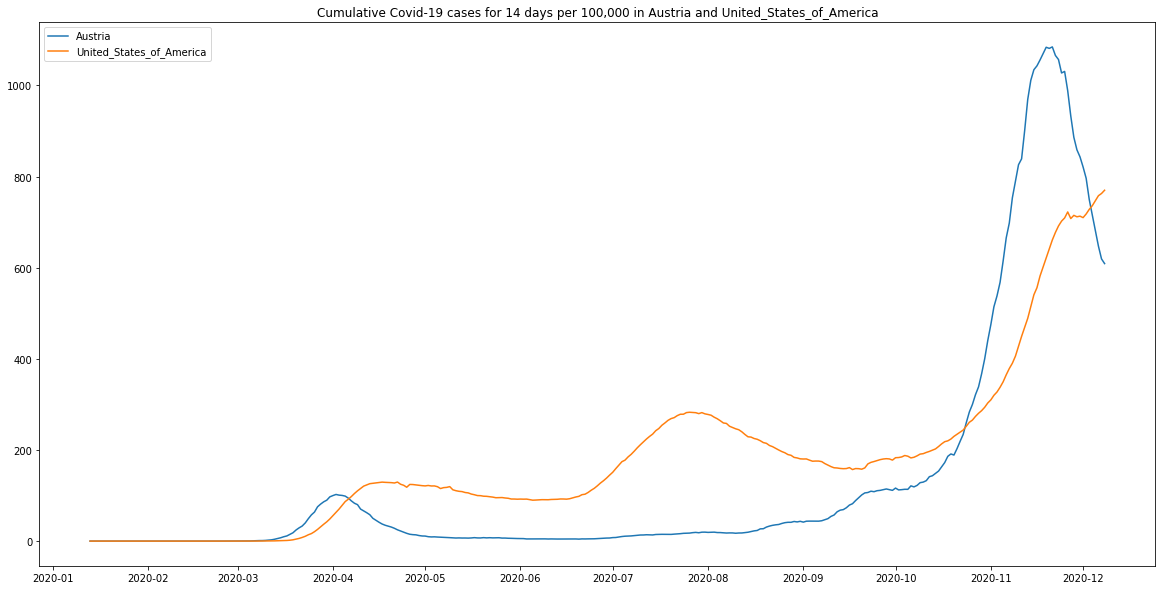

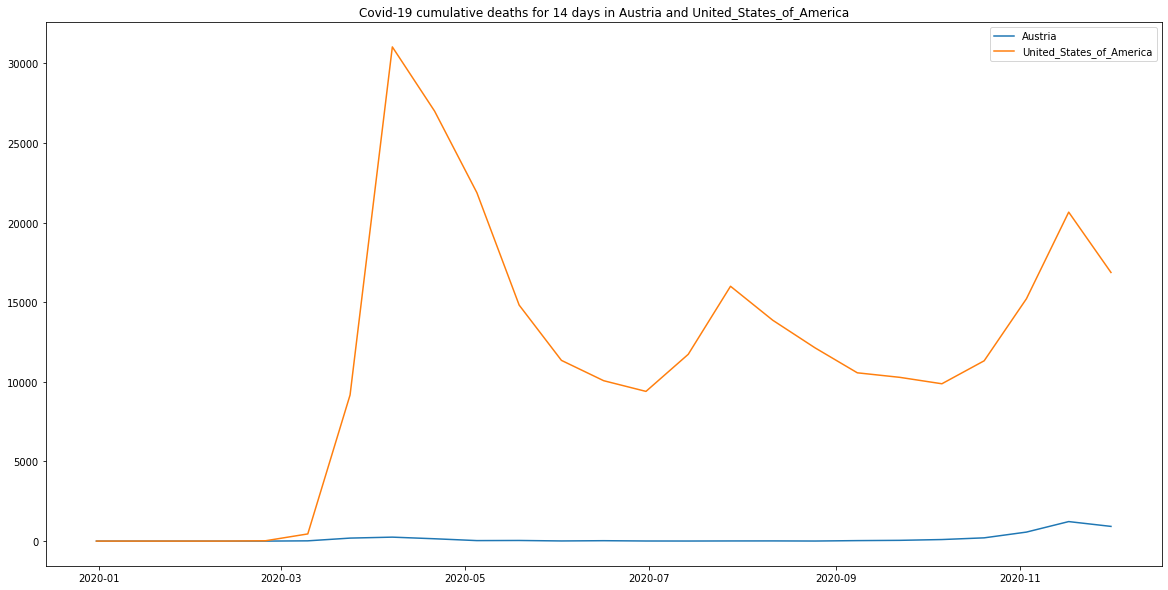

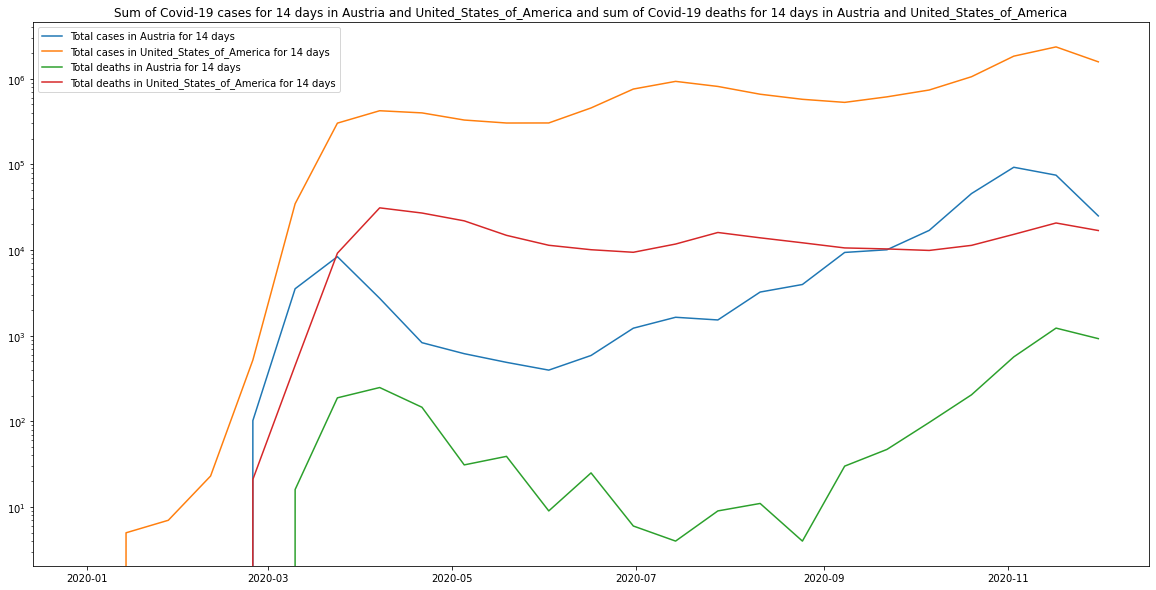

Austria is at percentile 84.98 in the world by the total latest number of Covid-19 cases for the last 14 days with 24975 total cases for 14 days
United_States_of_America is at percentile 100.0 in the world by the total latest number of Covid-19 cases for the last 14 days with 1571011 total cases for 14 days
Austria is at percentile 90.61 in the world by the total latest number of Covid-19 deaths for the last 14 days with 923 total deaths for 14 days
United_States_of_America is at percentile 100.0 in the world by the total latest number of Covid-19 deaths for the last 14 days with 16870 total deaths for 14 days


In [55]:
#@title STEP 9 - Visualize all results from the above functions (click on Run and view the output below)
my_graph_comparison()
my_graph_weekly_deaths_comparison()
cases_deaths_comparison()
percentil_absolute_comp_2()